# Project Description

## Quantifying Translation Rate of Mitochondrial mRNA

The goal of our project is to analyze raw data representing protein expression over time and infer translation elongation times of those genes of interest.

After DNA gets transcribed to mRNA in the cytoplasm, mRNA gets translated to protein. The translation elongation process has especially been found to be integral to mRNA localization to the mitochondria. Because the mitochondria is an important organelle for ATP production, our group wanted to calculate the rate of translation elongation of nuclear-encoded mitochondrial genes.

Our raw data contains measurements of luminescence from luciferase assays. This obtained by using an in-vivo elongation reporter containing luciferase to report the protein expression of the gene of interest (GOI). This reporter contains a tetracycline inducible promoter to govern transcription and translation of the GOI and luciferase. This data was imported in dataframe form. We know that protein expression is proportional to mRNA amounts and time, and mRNA amounts are proportional to DNA amounts and time. Knowing that DNA amounts are constant, nLuc expression can then be proportional to time. We can then take the square root of nLuc expression to produce a Schleif plot, which displays a nice linearization to further analyze the data (Schleif et al., 1973). After identifying the linear portion of the Schelif plot, we will produce a line of best fit to calculate the x-intercept, which represents the time it takes for the first protein to be produced. Then, we will take the difference between the x-intercepts of the control and the gene of interest in order to appreciate the elongation time of the gene of interest.

Works Cited:

Schleif, R., Hess, W., Finkelstein, S., & Ellis, D. (1973). Induction kinetics of the L-arabinose operon of Escherichia coli. Journal of bacteriology, 115(1), 9–14. https://doi.org/10.1128/jb.115.1.9-14.1973

Tatsuhisa Tsuboi, Matheus P Viana, Fan Xu, Jingwen Yu, Raghav Chanchani, Ximena G Arceo, Evelina Tutucci, Joonhyuk Choi, Yang S Chen, Robert H Singer, Susanne M Rafelski, Brian M Zid (2020) Mitochondrial volume fraction and translation duration impact mitochondrial mRNA localization and protein synthesis eLife 9:e57814. https://doi.org/10.7554/eLife.57814

Williams, C. C., Jan, C. H., & Weissman, J. S. (2014). Targeting and plasticity of mitochondrial proteins revealed by proximity-specific ribosome profiling. Science, 346(6210), 748-751.

### Team Member Names and Contributions
Please specify who in your group worked on which parts of the project (1-2 sentences per team member).

See PDF version.

## Project Code

If it makes sense for your project, you can have code and outputs here in the notebook as well.

- #### Import Modules and Raw Data

In [1]:
# import packages needed for data manipulation and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create the dataframe called lia_df from the csv file of luciferase induction assays
lia_df = pd.read_csv("luciferase induction assays.csv")
lia_df

,Time [s],CON (-ATC),CON (+ATC),HEM1 (-ATC),HEM1 (+ATC),COR1 (-ATC),COR1 (+ATC)
0,0.0,339,361,212,222,90,70
1,30.0,322,365,204,220,56,63
2,60.0,329,338,223,238,72,71
3,90.1,362,392,181,230,41,56
4,120.0,386,404,209,247,48,63
...,...,...,...,...,...,...,...
116,3480.4,679,40393,356,26195,76,4944
117,3510.7,650,40737,339,26573,59,4987
118,3540.4,662,41721,361,26957,86,5065
119,3570.5,676,42678,390,27226,59,4964


- #### Error Handling!
Before proceeding with data analysis, we need to ensure that the dataframe contains 121 rows. This indicates that the luciferase induction assay was done for 3600 seconds, or 1 hour. 

In [3]:
# test if the luciferase induction assay completes the recording for an hour
try:
    assert lia_df.shape[0] == 121, "Data set not complete."
except Exception as msg:
    print(msg)

- #### Data Visualization
Now, we will visualize translation rate of the control and experimental gene in the presence and absence of ATC. In the absence of ATC, also known as tetracycline, transcription is not induced. Therefore, we should expect to see very little expression in our plots.
From this point, we will use HEM1 gene as a training template for establishing well-defined functions that can be used for determining the transcription elongation rate. However, the code should work for any gene in the dataset as long as it contains the required measurements.

In [4]:
def plot_translated_protein_products(gene_withoutATC, gene_withATC):
    '''
    Plot the control and any gene protein products overtime to visualize the difference between two genes, taking the input of the name of columns of the target gene in the dataframe.
    By default, the plot will produce 2 subplots, one of those is the control gene, and the other is selected by user.
    
    :param gene_withoutATC: The name of the column for the target gene without tetracycline
    :param gene_withATC: The name of the column for the target gene with tetracycline
    
    '''

    # generate a figure with subplots
    fig, ax = plt.subplots(1,2,figsize=(20,7))

    # plot control(no ATC) and control(with ATC) on the first axis, [0]
    ax[0].scatter(lia_df.get('Time [s]'), lia_df.get('CON (-ATC)'))
    ax[0].scatter(lia_df.get('Time [s]'), lia_df.get('CON (+ATC)'))

    # plot control(no ATC) and control(with ATC) on the first axis, [1]
    ax[1].scatter(lia_df.get('Time [s]'), lia_df.get(gene_withoutATC))
    ax[1].scatter(lia_df.get('Time [s]'), lia_df.get(gene_withATC))

    # normalize the y range of the subplots to the largest number between the translated protein products of selected gene and control, add 2500 to expand the upper limit of y-axis
    ax[0].set_ylim(0, max(lia_df.get('CON (+ATC)').max(), lia_df.get('HEM1 (+ATC)').max()) + 2500)
    ax[1].set_ylim(0, max(lia_df.get('CON (+ATC)').max(), lia_df.get('HEM1 (+ATC)').max()) + 2500)

    # update axis parameters
    ax[0].set_ylabel('Translated Protein Products')
    ax[1].set_ylabel('Translated Protein Products')
    ax[0].set_xlabel('Time(sec)')
    ax[1].set_xlabel('Time(sec)')
    ax[0].set_title('Translated Protein Products in 1 hour for Control')
    ax[1].set_title('Translated Protein Products in 1 hour '+gene_withoutATC.split(' ')[0])
    
    # display the legend of the plots
    ax[0].legend(['CON (-ATC)', 'CON (+ATC)'], loc="upper left")
    ax[1].legend([gene_withoutATC, gene_withATC], loc="upper left")

    plt.show()

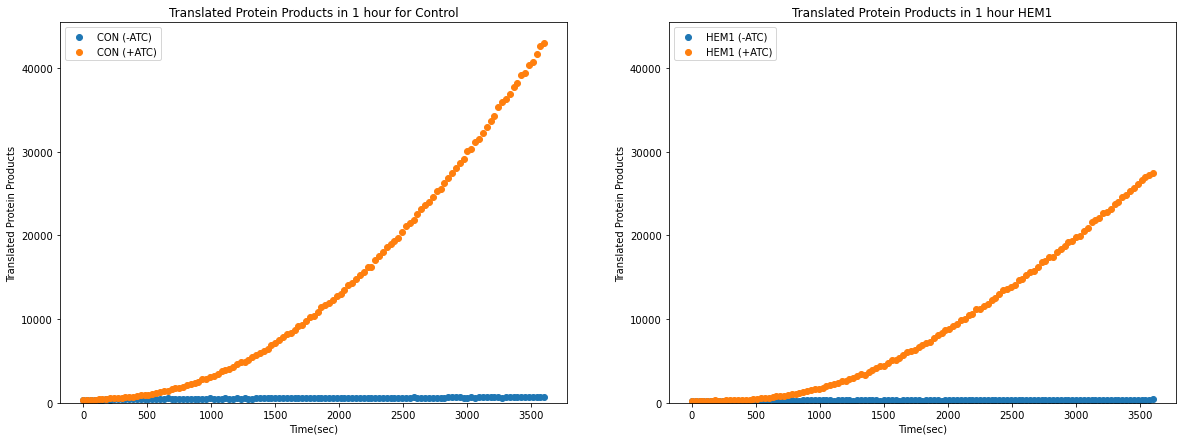

In [5]:
# plot the data for the control and target gene
plot_translated_protein_products('HEM1 (-ATC)', 'HEM1 (+ATC)')

- #### Data Normalization
After getting an idea of how our raw data looks like, we will normalize our data by doing the following calculation: (amount of protein produced in the presence of ATC) - (amount of protein produced in the absence of ATC). 
We will perform this calculation for both the control and experimental (HEM1) gene and create two new columns for these, called diff_CON and diff, respectively.

In [6]:
# add 2 columns containing the difference between the translated protein products with and without tetracycline
lia_df = lia_df.assign(diff_CON = lia_df.get('CON (+ATC)') - lia_df.get('CON (-ATC)'), 
                       diff_HEM1 = lia_df.get('HEM1 (+ATC)') - lia_df.get('HEM1 (-ATC)'))
lia_df

,Time [s],CON (-ATC),CON (+ATC),HEM1 (-ATC),HEM1 (+ATC),COR1 (-ATC),COR1 (+ATC),diff_CON,diff_HEM1
0,0.0,339,361,212,222,90,70,22,10
1,30.0,322,365,204,220,56,63,43,16
2,60.0,329,338,223,238,72,71,9,15
3,90.1,362,392,181,230,41,56,30,49
4,120.0,386,404,209,247,48,63,18,38
...,...,...,...,...,...,...,...,...,...
116,3480.4,679,40393,356,26195,76,4944,39714,25839
117,3510.7,650,40737,339,26573,59,4987,40087,26234
118,3540.4,662,41721,361,26957,86,5065,41059,26596
119,3570.5,676,42678,390,27226,59,4964,42002,26836


- #### Take the square root of difference
As previously mentioned, we need to take the square root of protein expression in order to create a Schlief plot. Schleif plots are useful because it linearizes data, from which we can infer the x-intercept.
We will add two additional columns called sqrt_CON and sqrt_HEM1 to our dataframe.

In [7]:
# add 2 columns containing the square root of the difference
lia_df = lia_df.assign(sqrt_CON = np.sqrt(lia_df.get('diff_CON')), 
                       sqrt_HEM1 = np.sqrt(lia_df.get('diff_HEM1')))
lia_df

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Time [s],CON (-ATC),CON (+ATC),HEM1 (-ATC),HEM1 (+ATC),COR1 (-ATC),COR1 (+ATC),diff_CON,diff_HEM1,sqrt_CON,sqrt_HEM1
0,0.0,339,361,212,222,90,70,22,10,4.690416,3.162278
1,30.0,322,365,204,220,56,63,43,16,6.557439,4.000000
2,60.0,329,338,223,238,72,71,9,15,3.000000,3.872983
3,90.1,362,392,181,230,41,56,30,49,5.477226,7.000000
4,120.0,386,404,209,247,48,63,18,38,4.242641,6.164414
...,...,...,...,...,...,...,...,...,...,...,...
116,3480.4,679,40393,356,26195,76,4944,39714,25839,199.283717,160.745140
117,3510.7,650,40737,339,26573,59,4987,40087,26234,200.217382,161.969133
118,3540.4,662,41721,361,26957,86,5065,41059,26596,202.630205,163.082801
119,3570.5,676,42678,390,27226,59,4964,42002,26836,204.943895,163.816971


- #### Specify Range

In [8]:
# user defined range for performing linear regression
lower_bound=input('What is the lower bound of your selection?')
upper_bound=input('What is the upper bound of your selection?')

What is the lower bound of your selection?1140
What is the upper bound of your selection?1800


In [9]:
# create a subset of the dataframe containing only the data points within the given interval
interval = lia_df[(lia_df.get('Time [s]')>=float(lower_bound))&(lia_df.get('Time [s]')<=float(upper_bound))]
interval

,Time [s],CON (-ATC),CON (+ATC),HEM1 (-ATC),HEM1 (+ATC),COR1 (-ATC),COR1 (+ATC),diff_CON,diff_HEM1,sqrt_CON,sqrt_HEM1
38,1140.4,483,4063,280,2371,55,234,3580,2091,59.833101,45.727453
39,1170.4,502,4272,293,2597,40,275,3770,2304,61.400326,48.000000
40,1200.4,525,4606,282,2620,48,278,4081,2338,63.882705,48.352870
41,1230.4,489,4837,284,2806,43,312,4348,2522,65.939366,50.219518
42,1260.5,522,4829,273,3006,47,369,4307,2733,65.627738,52.278102
43,1290.4,505,5148,292,3260,53,394,4643,2968,68.139563,54.479354
44,1320.2,503,5530,295,3383,33,389,5027,3088,70.901340,55.569776
45,1350.2,566,5684,291,3306,42,433,5118,3015,71.540198,54.909016
46,1380.2,558,5979,295,3726,57,449,5421,3431,73.627441,58.574739
47,1410.2,549,6235,294,3937,51,436,5686,3643,75.405570,60.357270


- #### Error Handling!
It wouldn't make sense to take the square root of a negative value. Therefore, negative_test and sqrt_validity_test check whether there is a negative value in our difference columns. If there is a negative value, it will give us an error message.

In [10]:
def negative_test(lower_bound, upper_bound, diff_gene):
    '''
    This function takes the lower_bound and upper_bound of the user\'s selection and test if there are negative values in the difference column for the given gene. 
    This function should report an error message if there is a negative value in the selected column, otherwise, should return nothing. 
    
    :param lower_bound: The lower bound string that is entered by user
    :param upper_bound: The upper bound string that is entered by user
    :param diff_gene: The name of the column in lia_df, which contains the difference between the translated protein products with and without tetracycline for the target gene
    '''
    
    # create a subset of the dataframe containing only the data points within the given interval
    interval = lia_df[(lia_df.get('Time [s]')>=float(lower_bound))&(lia_df.get('Time [s]')<=float(upper_bound))]
    
    # check every data points within the difference column, raise an error if there is a negative value
    for i in interval.get('diff_HEM1'):
        if i<=0:
            raise ValueError('There are negative values in the difference, try a different time interval.') 

In [11]:
def sqrt_validity_test(lower_bound, upper_bound, diff_gene):
    '''
    This function takes the lower_bound and upper_bound of the user\'s selection and test if there are negative values in the difference column for the given gene. 
    This function should report an error message if the try block fails, otherwise, should return nothing. 
    
    :param lower_bound: The lower bound string that is entered by user
    :param upper_bound: The upper bound string that is entered by user
    :param diff_gene: The name of the column in lia_df, which contains the difference between the translated protein products with and without tetracycline for the target gene
    '''
    
    # perform the negative_test with the given parameter to see if there is any failed value in the difference column, if the negative_test fails, the code should report an error message
    try:
        negative_test(lower_bound, upper_bound, diff_gene)
    except ValueError:
        print('There are negative values in the difference, try a different time interval.')
        raise

In [12]:
# test if the selected interval is valid for linear regression
sqrt_validity_test(lower_bound, upper_bound, 'diff_HEM1')

There is a negative value in the 'diff_HEM1' column in the first 200 seconds. We will use our test function to test the validity of the function. 

In [25]:
sqrt_validity_test(0, 200, 'diff_HEM1')

There are negative values in the difference, try a different time interval.


ValueError: There are negative values in the difference, try a different time interval.

- #### Find the equation of the line of best fit
Our function linear_regression will give us the equation of the line of best fit. We will then input sqrt_CON and sqrt_HEM1 to determine the equation for the control and experimental (HEM1) gene, respectively.

In [14]:
def standard_unit(sqrt): 
    '''
    This function converts the square root of a series/array into its standard units
    
    :param sqrt: The name of the column in interval dataframe, which contains the square root of the difference between the translated protein products with and without tetracycline for the target gene
    '''
    
    mean = np.mean(sqrt) # calculate the mean of the square root of given gene
    std = np.std(sqrt) # calculare the standard deviation of the square root of given gene
    return (sqrt-mean)/std # standard unit = (x-mean)/standard deviation

In [15]:
def linear_regression(sqrt):
    '''
    This function finds the best fit linear regression line based on given interval and the target gene.
    This function should return 3 parameters, including the slope of the best-fit line, the intercept of the best-fit line, and a string containing the equation in standard form.
    
    :param sqrt: The name of the column which contains the square root info for the target gene
    '''
    
    # find the best-fit linear regression line
    r = np.mean(standard_unit(interval.get(sqrt))*standard_unit(interval.get('Time [s]'))) # calculate the correlation coefficient
    slope = r*np.std(interval.get(sqrt))/np.std(interval.get('Time [s]')) # calculate the slope based on the correlation coefficient
    y_intercept = np.mean(interval.get(sqrt))-slope*np.mean(interval.get('Time [s]')) # calculate the y-intercept based on the slope and the mean of independent and dependent variable
    equation = 'Linear Regression Line Equation: ' + 'y = '+str(y_intercept)+' + '+str(slope)+' * x'
    return slope, y_intercept, equation

In [16]:
# calculate the linear regression for the control
linear_regression('sqrt_CON')

(0.06086408218934878,
 -9.974589922964782,
 'Linear Regression Line Equation: y = -9.974589922964782 + 0.06086408218934878 * x')

In [17]:
# calculate the linear regression for the target gene 
linear_regression('sqrt_HEM1')

(0.05467271887843059,
 -16.789624151693353,
 'Linear Regression Line Equation: y = -16.789624151693353 + 0.05467271887843059 * x')

- #### Create Schleif Plot
Now, we can create a Schleif plot for control and target gene!

In [18]:
def Schleif_Plot(lower_bound, upper_bound, sqrt):
    '''
    This function plots the Schleif_Plot and the scatter plot of the original data between the interval.
    This function should produce a graph, otherwise, no other output.
    
    :param lower_bound: The lower bound string that is entered by user
    :param upper_bound: The upper bound string that is entered by user
    :param sqrt: The name of the column which contains the square root info for the target gene
    '''
    
    # setup of the Schleif Plot 
    x = np.linspace(float(lower_bound), float(upper_bound)) # set the range on the x-axis which should be the range between the lower_bound and upper_bound
    y = linear_regression(sqrt)[1] + linear_regression(sqrt)[0]*x # use the output of linear_regression(sqrt) function to draft the equation
    fig = plt.figure(figsize = (10, 5))
    
    # plot the graphs
    plt.plot(x, y) # plot the Schleif Plot
    plt.scatter(interval.get('Time [s]'), interval.get(sqrt)) # plot the scatter plot
    
    # update axis parameters
    plt.title('Schleif Plot for '+ sqrt.split('_')[1])
    plt.ylabel('Square Root of Difference')
    plt.xlabel('Time(sec)')
 
    plt.show()

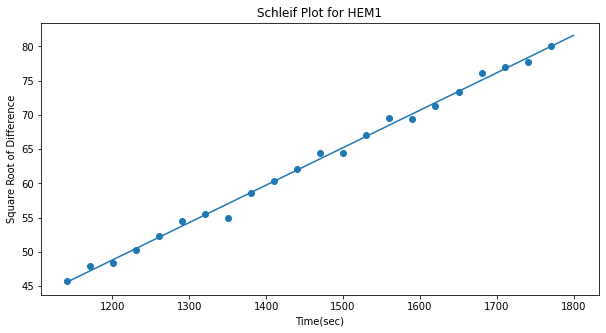

In [19]:
# plot the Schleif Plot and scatter plot in a single graph
Schleif_Plot(lower_bound, upper_bound, 'sqrt_HEM1')

- #### Determine x-intercept
As our ultimate goal is to determine elongation rate, we need to calculate time. The x-intercept of a Schelif plot represents the time it takes for the first protein to be produced. 

In [20]:
def x_intercept(lower_bound, upper_bound, sqrt):
    '''
    This function calculates the x-intercept based on the linear regression line. 
    
    :param lower_bound: The lower bound string that is entered by user
    :param upper_bound: The upper bound string that is entered by user
    :param sqrt: The name of the column which contains the square root info for the target gene
    '''
    
    equation = linear_regression(sqrt)# find the linear equation
    x_intercept = -equation[1] / equation[0] # calcualte the x-intercept by setting y=0
    return x_intercept

In [21]:
# calculate the x_intercept for control
x_intercept(lower_bound, upper_bound, 'sqrt_CON')

163.88302532737995

In [22]:
# calculate the x_intercept for target gene
x_intercept(lower_bound, upper_bound, 'sqrt_HEM1')

307.0932724056856

- #### Calculate Translation Elongation Rate
Finally, we are ready to calculate the elongation rate of our control and target gene! Translation elongation rate is determined by dividing the number of proteins (peptide_num) by the translation elongation time (translation_elongation_time).

- #### Error Handling!
After calculating the translation elongation rate, we also wanted to check that the rate was within a reasonable range. If the rate is outside of this range, it will raise an error.

In [23]:
def elongation_rate(mrna, sqrt, lower_bound, upper_bound):
    '''
    This function calculates the elongation rate for the target gene.
    
    :param mrna: The length of the mrna for the target gene in interger
    :param sqrt: The name of the column which contains the square root info for the target gene
    :param lower_bound: The lower bound string that is entered by user
    :param upper_bound: The upper bound string that is entered by user
    
    '''
    
    peptide_num = mrna/3 # determining polypeptide length
    transcription_elongation_time = mrna/25 # transcription elongation time in seconds calculated from knowing transcription occurs at 25 amino acids/sec
    elongation_time = x_intercept(lower_bound, upper_bound, sqrt)-x_intercept(lower_bound, upper_bound, 'sqrt_CON') # determining the total elongation time of the gene of interest
    translation_elongation_time = elongation_time-transcription_elongation_time # subtracts out the transcription elongation time from the total elongation time to isolate the translation elongation time
    translation_elongation_rate = peptide_num/translation_elongation_time 
    
    # test if the elongation rate is in a reasonable range
    if not translation_elongation_rate>0 and translation_elongation_rate<=30:
        raise ValueError('The translational elongation rate isn\'t within a reasonable range, try a new time interval.')
    
    return translation_elongation_rate

In [24]:
# find the elongation rate for the target gene
elongation_rate(1644, 'sqrt_HEM1', lower_bound, upper_bound)

7.075510029631639

## Reflection

See PDF version.